# 作業
### 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

In [89]:
from sklearn import datasets, manifold
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [90]:
X.shape

(1797, 64)

In [91]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [92]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [93]:
# 模型參數
n_samples, n_features = X.shape
n_neighbors = 30
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)

Computing t-SNE embedding


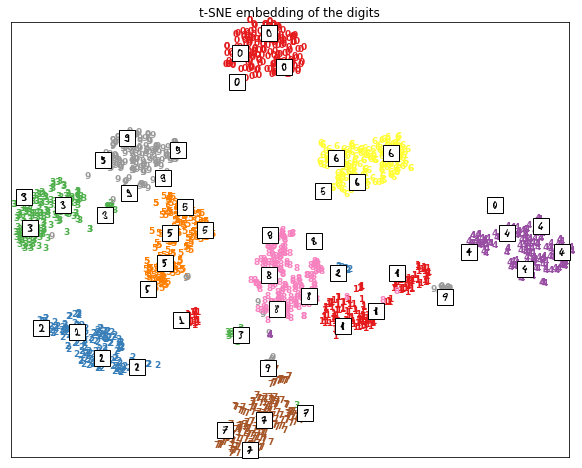

In [96]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min) # min-max
    
    plt.figure(figsize=(10, 8))
    ax = plt.subplot(111)
    for i in range(n_samples):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(y[i]/10), fontdict={'weight':'bold', 'size':9})
    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])
        for i in range(n_samples):
            dist = np.sum((X[i] - shown_images) ** 2, 1) # 算距離 兩個維度相加
            if np.min(dist) < 4e-3: # 太遠的不算
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
            plt.xticks([])
            plt.yticks([])
            if title is not None:
                plt.title(title)
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")

X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits")

plt.show()

In [ ]:
X_tsne